# Ridge Regression and Lasso Regression

También son llamados métodos de regularización. Se utilizan especialmente cuando el número de variables predictoras es mayor al número de observaciones. Con ellos:

   1. Se logra que los coeficientes del modelo tiendan a cero.
   2. Se minimiza el riesgo de _overfitting_.
   3. Se reduce la varianza.
   4. Se atenúa el efecto de la correlación entre las variables predictoras.
   5. Se reduce la influencia en el modelo de las variables predictoras menos relevantes.

**Ridge Regression:**

- Se agrega una penalización equivalente al cuadrado de la magnitud de los coeficientes.

- Se minimiza: $\displaystyle \sum_{i = 1}^{n} (y_{i} - \hat{y}_{i})^{2} + \lambda \sum_{j = 1}^{p} \beta_{j}^{2}$, donde

$\displaystyle \sum_{i = 1}^{n} (y_{i} - \hat{y}_{i})^{2} = $ Suma del cuadrado de los residuales.

$\displaystyle \sum_{j = 1}^{p} \beta_{j}^{2} = $ Se penaliza la suma de los coeficientes elevados al cuadrado.

$\lambda = $ Determina el peso de la penalización.


_Notas:_

- Si $\lambda = 0$ entonces se tiene el modelo de regresión lineal simple.

- Si $\lambda \to \infty$ entonces la pendiente de la recta de los valores estimados tiende a cero. Las predicciones se hacen cada vez menos sensibles a las variables explicativas.

- Se utiliza la validación cruzada (_Cross Validation_) para encontrar $\lambda$ que cumpla $0 < \lambda < \infty$. Con esto se determina cuál valor tiene la menor varianza.

**Lasso Regression _(Least Absolute Shrinkage and Selection Operator)_:**

- Se agrega una penalización equivalente al valor absoluto de la magnitud de los coeficientes.

- Se minimiza: $\displaystyle \sum_{i = 1}^{n} (y_{i} - \hat{y}_{i})^{2} + \lambda \sum_{j = 1}^{p} |\beta_{j}|$

_Nota:_
- Si $\lambda \to \infty$ entonces la pendiente de la recta de los valores estimados es cero. Los pesos $\beta_{j}$ de las variables que no explican el modelo se hacen cero. Esto hace que la ecuación a minimizar sea más sencilla y más fácil de interpertar cuando se tienen muchas variables que no se utilizan.


**Interpretación de los coeficientes:**

Cada valor $\beta_{i}$ corresponde a una variable predictora. El valor indica qué tanto cambia **Y** por cada unidad que cambia **$X_{i}$** mientras las demás **$X_{j}$** (con $i \neq j$) permanecen constantes.

Entre más grande sea el valor de $\beta_{i}$, más significativa es la _i-ésima_ variable predictora ($X_{i}$). La influencia puede ser positiva o negativa.

Las variables con $\beta_{i} > 0$ y grandes, tienen mayor influencia en el modelo que variables con $\beta_{i}$ cercanos a cero.

Las variables con $\beta_{i} < 0$ tienen un efecto negativo en las predicciones del modelo.

**Ejemplos:**

En este archivo se verán 2 ejemplos que muestran ambas regresiones.

   - En _Ridge Regression_ se van a comparar 3 modelos
        1. $\lambda = 5$

        2. $\lambda = 0$

        3. $\lambda$ elegida con _cross validation_

   Para elegir el mejor de los 3 modelos vamos a calcular el error cuadrático medio: $ECM_{\lambda} = \dfrac{\displaystyle \sum_{i = 1}^{n} (real_{i} − estimado_{i})^{2}}{n}$.

   Se elegirá el que tenga el menor $ECM_{\lambda}$
   
   - En _LASSO Regression_ se va a definir el modelo utilizando $\lambda$ elegida con _cross validation_

In [1]:
# Se cargan las librerías que se van a utilizar en ambos ejemplos
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', 25) # by default is 10, if change to None print ALL

In [3]:
## 1) EXTRAER DATOS
# Los datos pueden encontrarse en diferentes formatos, en nuestro caso están en formato csv.

# Se carga la base de datos
df = pd.read_csv('Hitters.csv') #Se encuentra en la misma carpeta que el jupyter notebook
print(df.shape) #Se tienen 322 renglones y 21 columnas

(322, 21)


In [4]:
## 2) ANÁLISIS EXPLORATORIO
# Se realiza una descripción analítica de los datos.
df.head()# Se muestran los primeros 5 datos del data frame

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Los datos corresponden a la información de 322 jugadores de baseball en 1986 y 1987.

Los términos utilizados se pueden encontrar en: https://www.mlb.com/glossary/

La información que se tiene de cada uno de los jugadores es (21 columnas):

   - **Player:** Nombre del jugador
   - **AtBat:** Número de veces al bat en 1986
   - **Hits:**  Número de hits en 1986 (cuando se le pega a la pelota y se llega al menos a la primera base)
   - **HmRun:** Número de home runs en 1986
   - **Runs:** Número de carreras en 1986
   - **RBI:** Número de carreras impulsadas (carreras hechas por sus compañeros a causa suya) en 1986, (Runs Batted In)
   - **Walks:** Número de bases por bolas en 1986

   - **Years:** Número de años en ligas mayores
   - **CAtBat:** Número de veces al bat durante su carrera
   - **CHits:** Número de hits durante su carrera
   - **CHmRun:** Número de home runs durante su carrera
   - **CRuns:** Número de carreras durante su carrera
   - **CRBI:** Número de carreras impulsadas durante su carrera
   - **CWalks:** Número de bases por bolas durante su carrera

   - **League:** Variable categórica que indica la liga del jugador al final de 1986 (A = American League -> Bateador designado batea en lugar del pitcher, N = National League -> Todos los jugadores batean)
   - **Division:** Variable categórica que indica la división del jugador al final de 1986 (E = East, W = West)
   - **PutOuts:** Número de outs en 1986
   - **Assists:** Número de asistencias en 1986 (se acredita a un jugador defensivo que lanza o toca la pelota antes de un out)
   - **Errors:** Número de errores en 1986

   - **Salary:** Salario anual de 1987 en miles de dólares al día inaugural
   - **NewLeague:** Factor con niveles A y N que indican la liga del jugador al inicio de 1987

In [5]:
# Se cuenta el número de NaN's por columna
df.isnull().sum() #Se tienen 59 NaN's en la columna del Salario

Player        0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
#En este caso vamos a eliminar los renglones de los jugadores con NaN en su salario.
#También vamos a eliminar la columna del nombre del jugador.
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis = 1)
print('Antes se tenían 322 renglones y 21 columnas.\nAhora se tienen ',df.shape[0],' renglones y ',df.shape[1],' columnas.')
print('Se eliminaron ',322-df.shape[0],' renglones.')
df.head()

Antes se tenían 322 renglones y 21 columnas.
Ahora se tienen  263  renglones y  20  columnas.
Se eliminaron  59  renglones.


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [7]:
# Se definen las varibles X (predictoras) y Y (dependiente)
Y = df.Salary
X = df.drop(['Salary'], axis = 1)#Se elimina la columna del salario
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A


In [8]:
#Se definen las variables dummies para las variables categóricas
dummies = pd.get_dummies(X[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [9]:
#Se eliminan las columnas 'League', 'Division', 'NewLeague' y se reemplazan por
#las variables dummies (una por cada columna).
#Recordemos los valores de cada variable:
# 'League' y 'NewLeague': A y N
# 'Division': E y W

X = X.drop(['League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

print(X.shape[0],' renglones\n',X.shape[1],' columnas')
X.head()

263  renglones
 19  columnas


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [10]:
# Se cuenta el número de NaN's por columna
df.isnull().sum() #No hay NaN's

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [11]:
#Se define un vector con las descripciones de cada columna en el data frame X:
descrip = ['Número de veces al bat en 1986',
           'Número de hits en 1986',
           'Número de home runs en 1986',
           'Número de carreras en 1986',
           'Número de carreras impulsadas en 1986',
           'Número de bases por bolas en 1986',
           'Número de años en ligas mayores',
           'Número de veces al bat durante su carrera',
           'Número de hits durante su carrera',
           'Número de home runs durante su carrera',
           'Número de carreras durante su carrera',
           'Número de carreras impulsadas durante su carrera',
           'Número de bases por bolas durante su carrera',
           'Número de outs en 1986',
           'Número de asistencias en 1986',
           'Número de errores en 1986',
           'Liga del jugador al final de 1986: 0 = American League, 1 = National League',
           'División del jugador al final de 1986: 0 = East, 1 = West',
           'Liga del jugador al inicio de 1987: 0 = American League, 1 = National League']

C:\Users\miri_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia relativa')

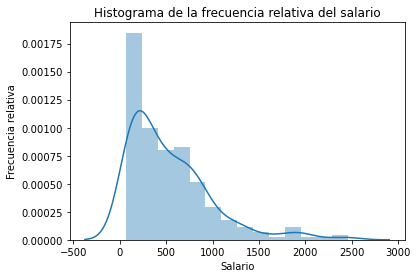

In [12]:
## 3) VISUALIZACIÓN DE LOS DATOS
# Para entender mejor los datos es necesario graficarlos.

#Histograma de la frecuencia relativa del salario con la densidad ajustada correspondiente.
sns.distplot(Y)
plt.title('Histograma de la frecuencia relativa del salario')
plt.xlabel('Salario')
plt.ylabel('Frecuencia relativa')

In [13]:
Y.describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

Mínimo =  19.0
Máximo =  687.0


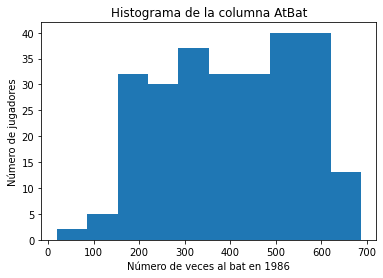

Mínimo =  1.0
Máximo =  238.0


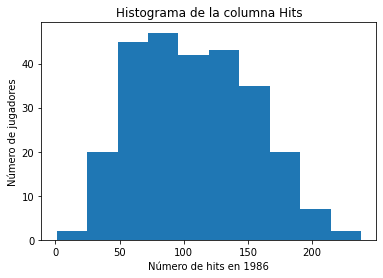

Mínimo =  0.0
Máximo =  40.0


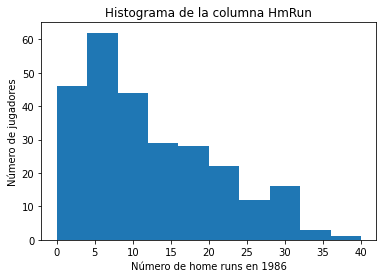

Mínimo =  0.0
Máximo =  130.0


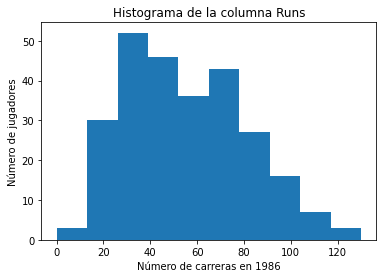

Mínimo =  0.0
Máximo =  121.0


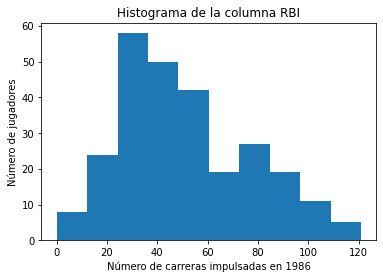

Mínimo =  0.0
Máximo =  105.0


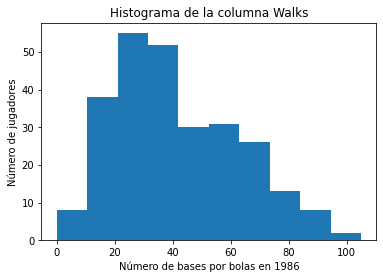

Mínimo =  1.0
Máximo =  24.0


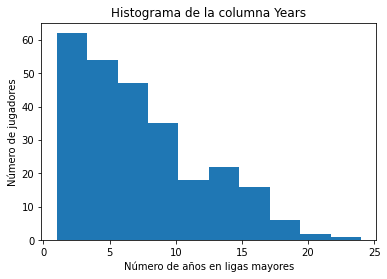

Mínimo =  19.0
Máximo =  14053.0


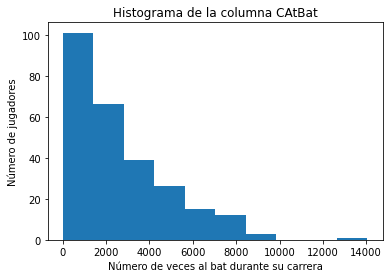

Mínimo =  4.0
Máximo =  4256.0


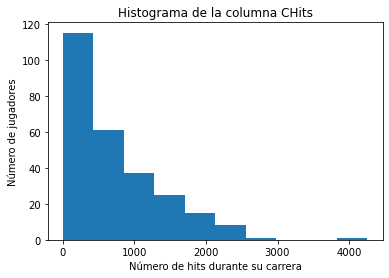

Mínimo =  0.0
Máximo =  548.0


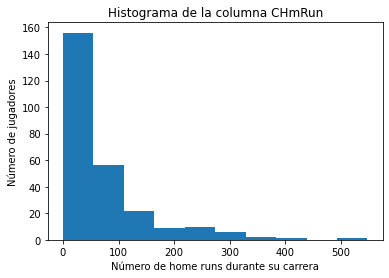

Mínimo =  2.0
Máximo =  2165.0


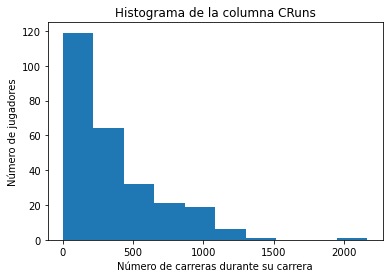

Mínimo =  3.0
Máximo =  1659.0


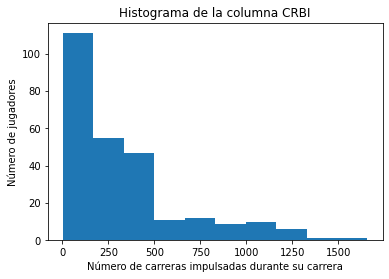

Mínimo =  1.0
Máximo =  1566.0


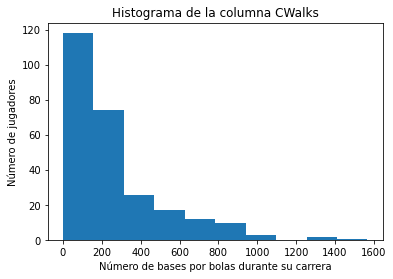

Mínimo =  0.0
Máximo =  1377.0


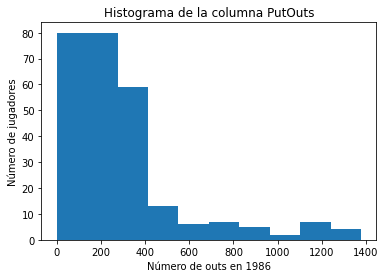

Mínimo =  0.0
Máximo =  492.0


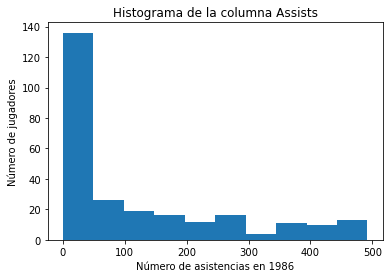

Mínimo =  0.0
Máximo =  32.0


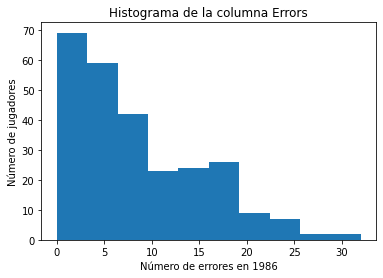

Mínimo =  0
Máximo =  1


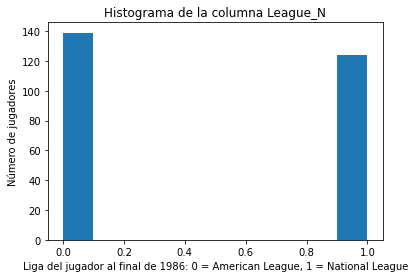

Mínimo =  0
Máximo =  1


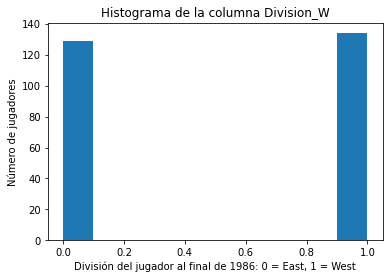

Mínimo =  0
Máximo =  1


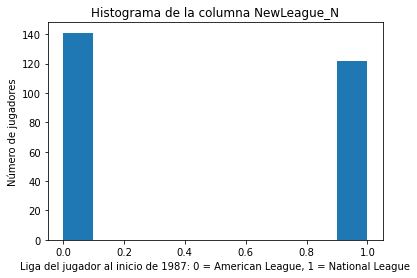

In [14]:
#Histogramas de cada columna
for i in range(0,X.shape[1]): #[0,19)
    print('Mínimo = ',min(X.iloc[:,i]))
    print('Máximo = ',max(X.iloc[:,i]))
    plt.hist(X.iloc[:,i])
    plt.title('Histograma de la columna ' + X.columns[i])
    plt.xlabel(descrip[i])
    plt.ylabel('Número de jugadores')
    plt.show()

Promedio =  403.64


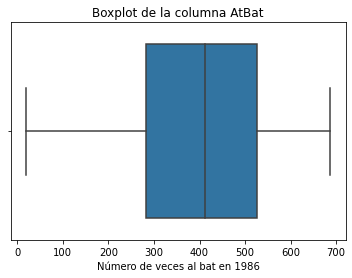

Promedio =  107.83


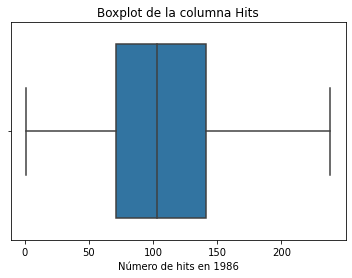

Promedio =  11.62


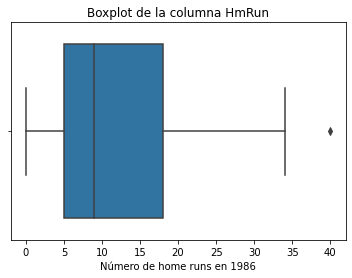

Promedio =  54.75


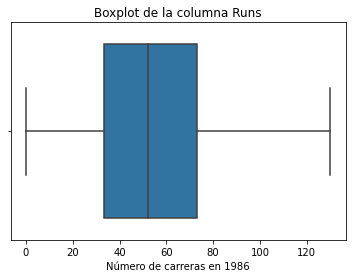

Promedio =  51.49


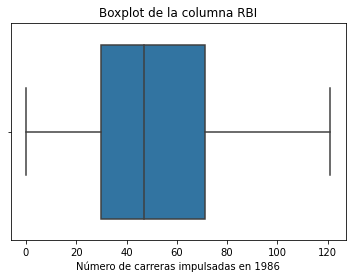

Promedio =  41.11


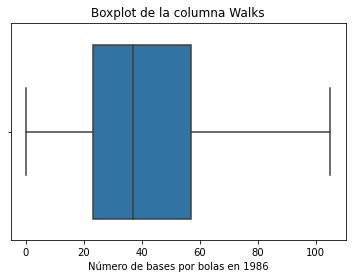

Promedio =  7.31


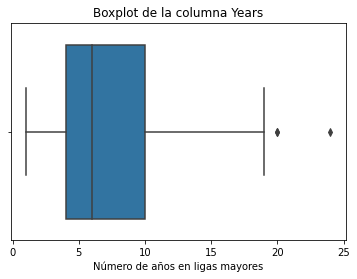

Promedio =  2657.54


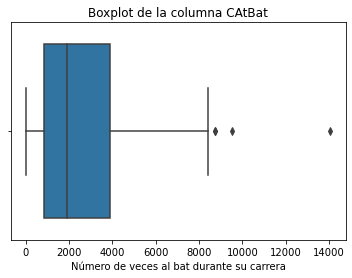

Promedio =  722.19


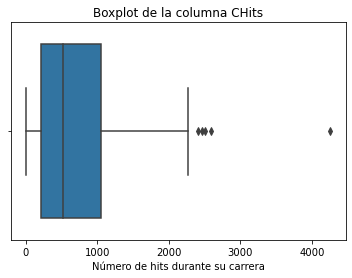

Promedio =  69.24


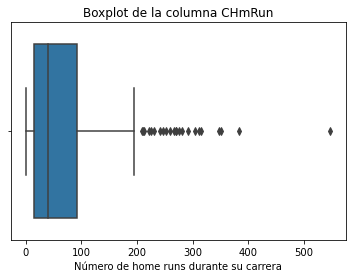

Promedio =  361.22


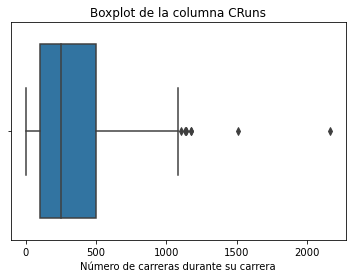

Promedio =  330.42


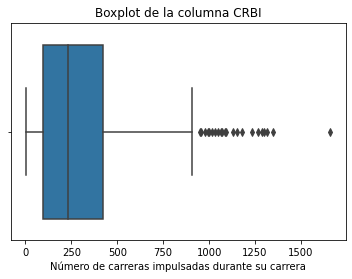

Promedio =  260.27


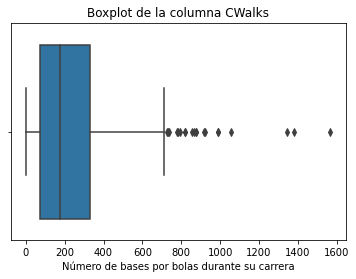

Promedio =  290.71


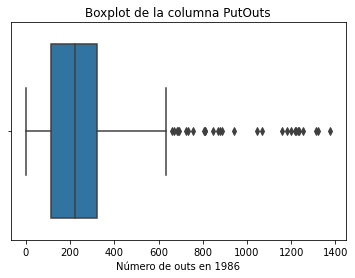

Promedio =  118.76


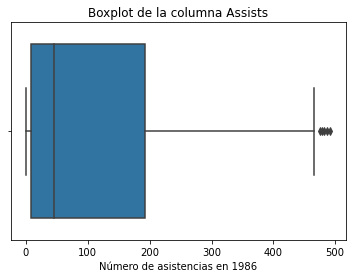

Promedio =  8.59


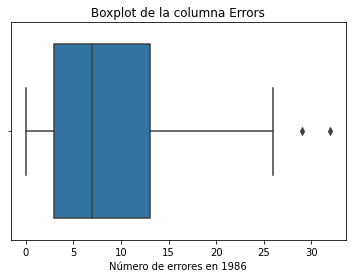

In [15]:
#Boxplots de cada columna
for i in range(0,(X.shape[1]-3)): #[0,16)
    print('Promedio = ',round(np.mean(X.iloc[:,i]),2))
    plt.title('Boxplot de la columna ' + X.columns[i])
    sns.boxplot(x=X.columns[i], data=X).set(xlabel=descrip[i])
    plt.show()
#No se muestran las gráficas de las columnas con variables dummies

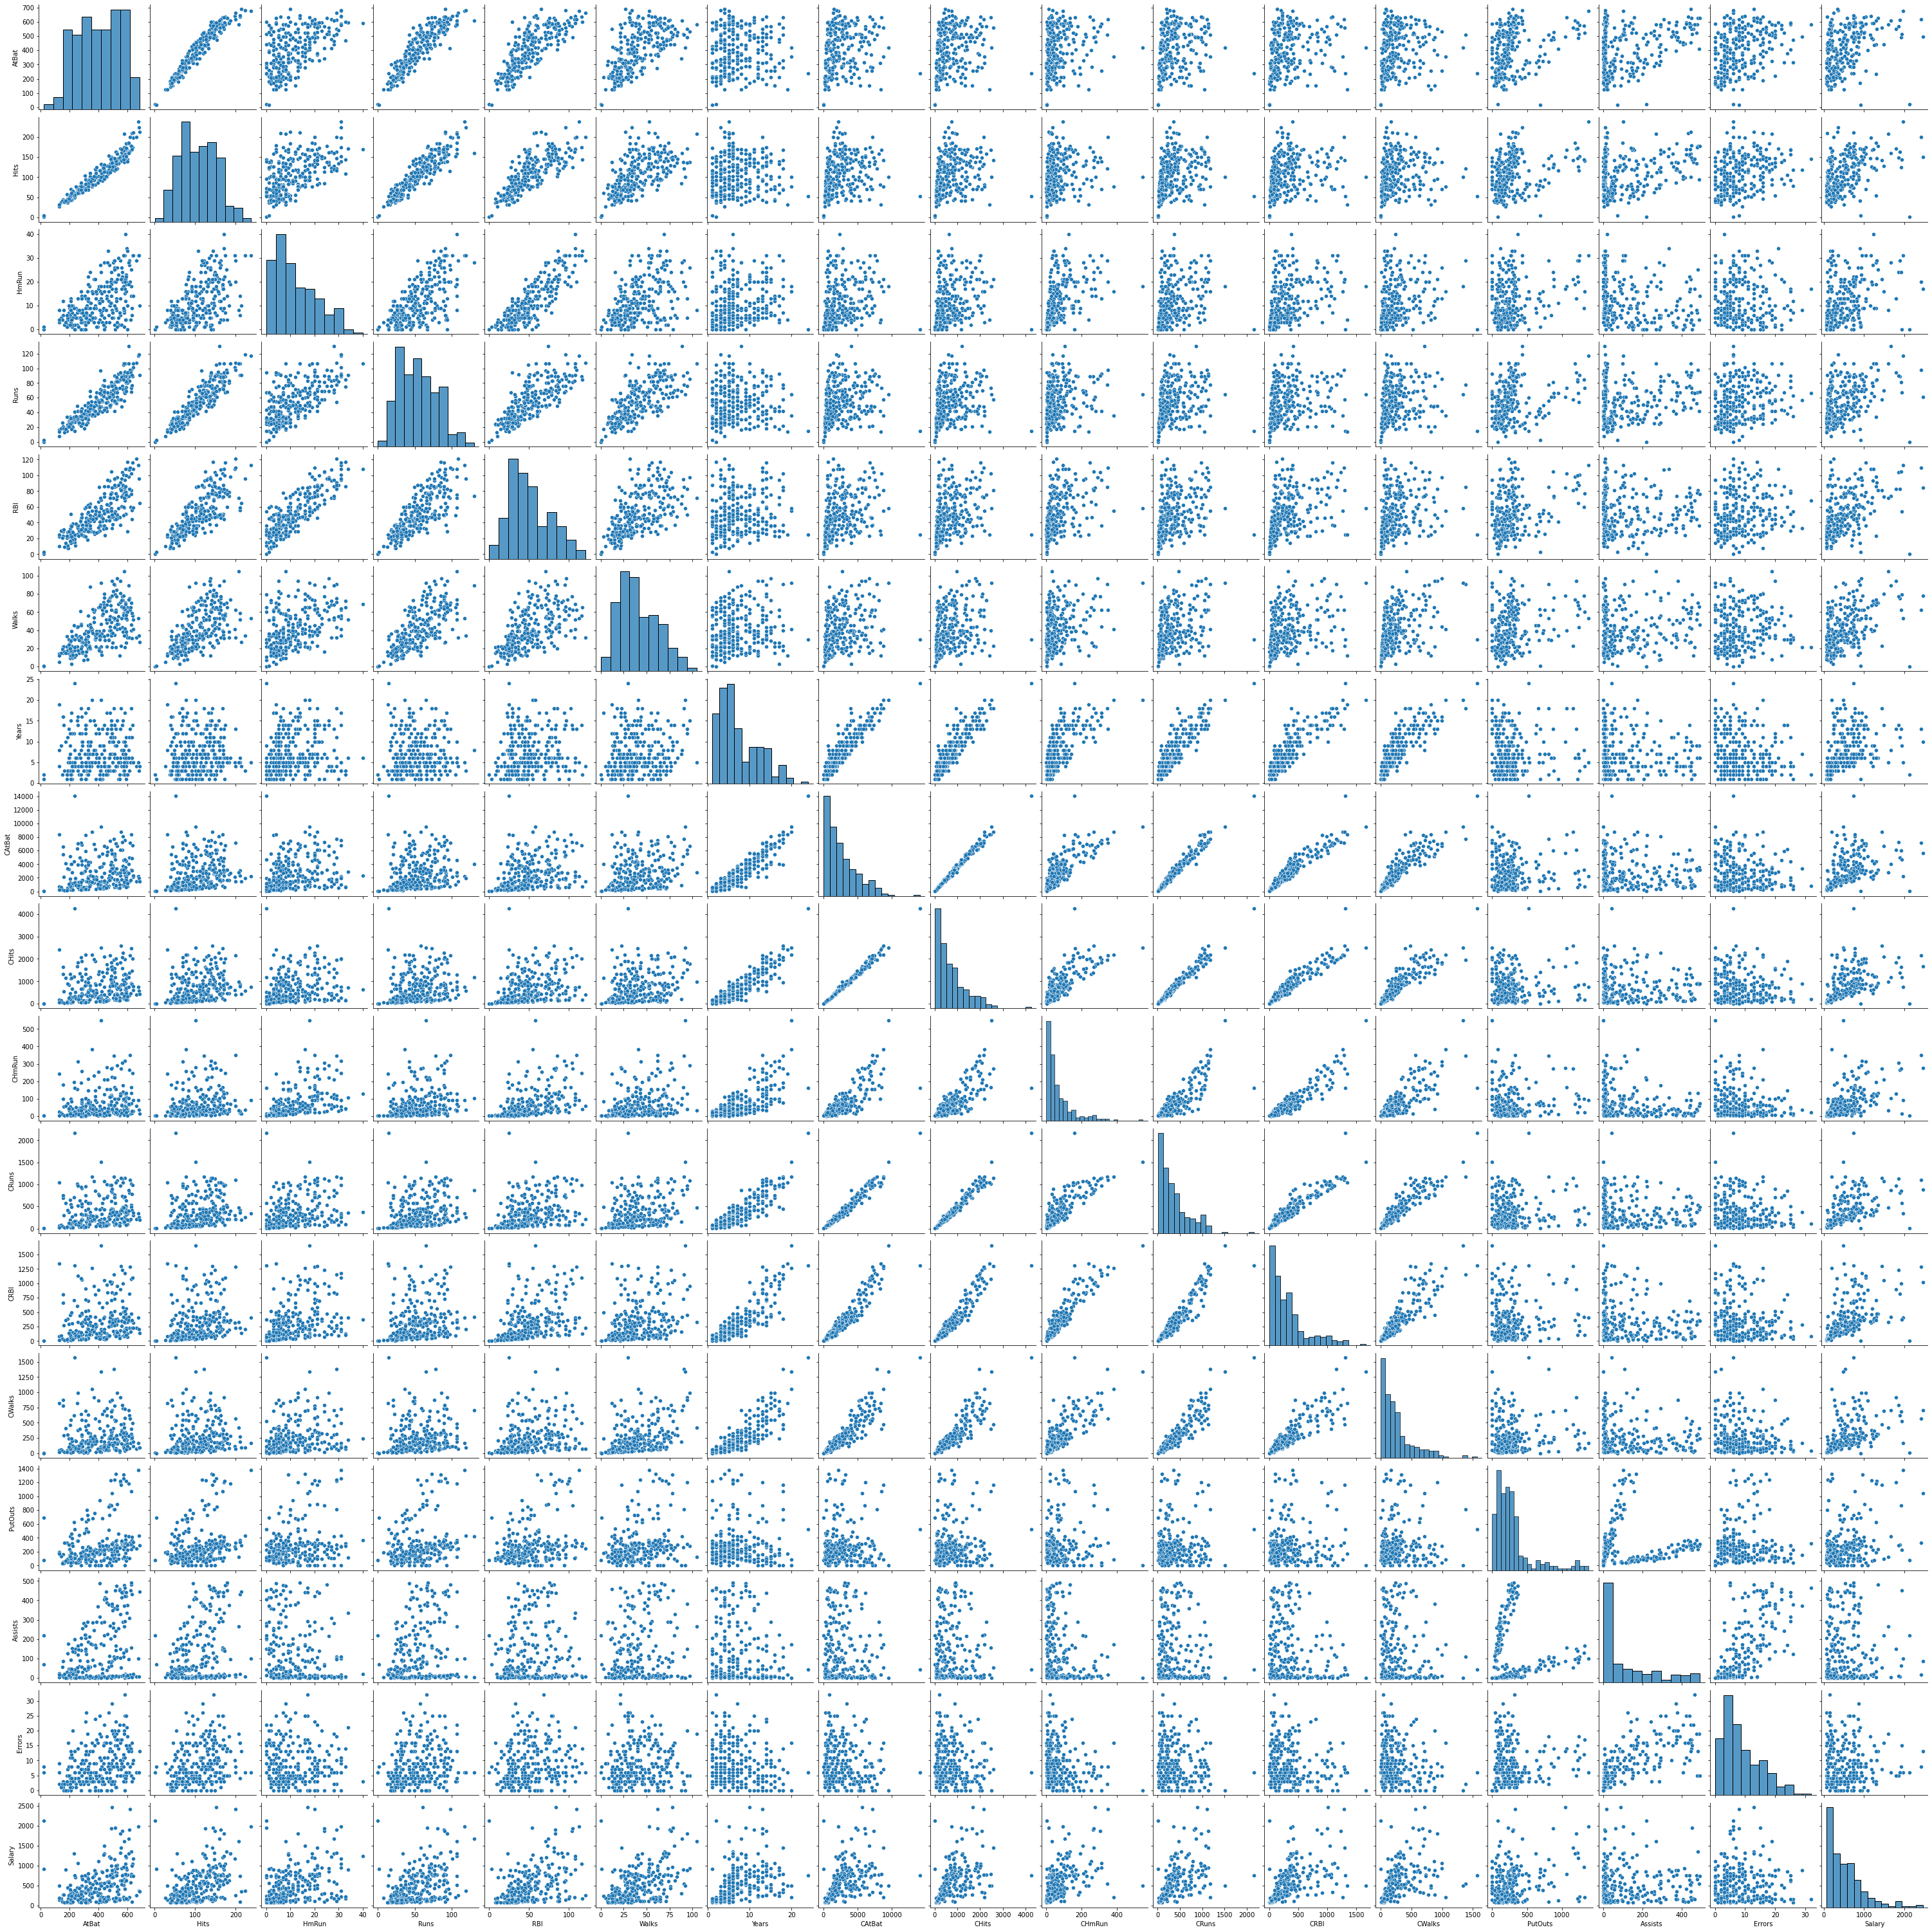

In [16]:
#Se muestra la correlación entre las variables
sns.pairplot(df)

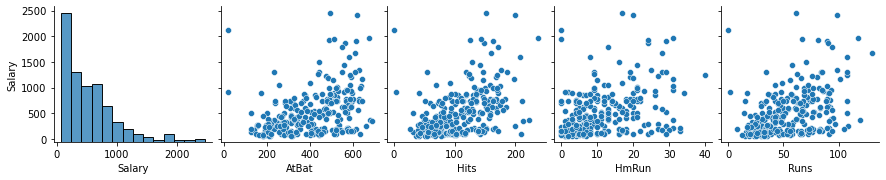

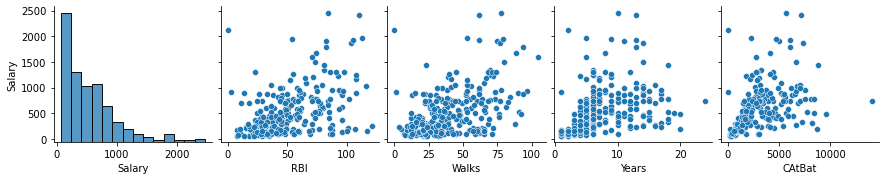

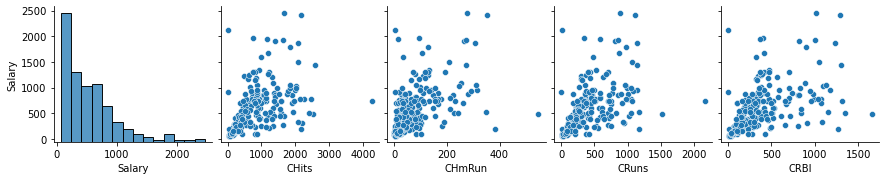

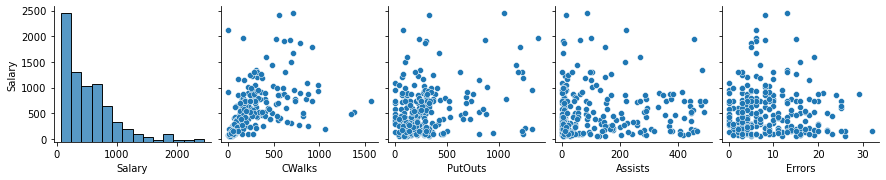

In [17]:
#Se muestra la correlación entre el salario y las variables predictivas
for i in [0,4,8,12]:
    sns.pairplot(data=df,
                  y_vars=['Salary'],
                  x_vars=['Salary',X.columns[i], X.columns[i+1], X.columns[i+2],X.columns[i+3]])
    plt.show()
#No se muestran las gráficas de las columnas con variables dummies

In [18]:
# Definimos el vector de lambdas, recordemos que el string 'lambda' está reservado para 
#las funciones con una sola instrucción.
#El vector tiene un gran rango de valores para poder cubrir varios escenarios.

print(np.linspace(10,-2,100)[:10])

lambdas = 10**np.linspace(10,-2,100)*0.5
'''
Con np.linspace(10,-2,100) se define un vector que va de 10 a -2, tiene 100 entradas .
Se eleva 10 a cada uno de esos valores.
Finalmente, cada una de esas entradas se multiplica por 0.5.
'''
print(lambdas[:10]) #Se muestran los primeros 10 valores del vector
print(lambdas[-10:]) #Se muestran los últimos 10 valores del vector

[10.          9.87878788  9.75757576  9.63636364  9.51515152  9.39393939
  9.27272727  9.15151515  9.03030303  8.90909091]
[5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08]
[0.06164234 0.04663017 0.03527401 0.0266835  0.02018509 0.01526928
 0.01155065 0.00873764 0.00660971 0.005     ]


In [19]:
## 4) DIVIDIR LOS DATOS
# Se separan los datos en 2 grupos (usualmente 80% y 20%):
# i) Para entrenar al modelo (80%)
# ii) Para probar el modelo (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, #Se indican los vectores que se van a dividir
                                                    test_size = 0.2, #Se indica el porcentaje de los datos para probar el modelo
                                                    random_state = 1) #Se fija la semilla

# Nota: Tomar la muestra aleatoria es muy importante porque en caso de que los datos estén
#ordenados el algoritmo no aprende adecuadamente. Por ejemplo si tenemos 80 sanos y 20 enfermos,
#sólo se tomarían los 80 sanos (por ser los primeros 80).

## Ridge Regression

In [20]:
# Se cargan las librerías que se van a utilizar
from sklearn.linear_model import Ridge, RidgeCV

In [21]:
#Se definen las variables que se van a utilizar
ridge = Ridge(normalize = True)#Para estandarizar las variables el parámetro "normalize" es verdadero
coefs = []

#Se llena la matriz con coeficientes asociadas a cada variable independiente y a cada valor de lambda
for k in lambdas:
    ridge.set_params(alpha = k)#Se toman los valores de lambda
    ridge.fit(X_train, Y_train)#Se ajusta el modelo
    coefs.append(ridge.coef_)#Se generan los coeficientes correspondientes
    
print(np.shape(coefs))
coefs[0]

(100, 19)


array([ 2.55239941e-10,  9.24521722e-10,  3.88144761e-09,  1.52432727e-09,
        1.70767792e-09,  1.74368440e-09,  6.90244102e-09,  1.92389845e-11,
        7.08013842e-11,  5.75239374e-10,  1.43145914e-10,  1.50246338e-10,
        1.56443661e-10,  1.15292305e-10, -4.61102100e-12,  3.12151235e-10,
       -5.03093331e-09, -3.46582996e-08, -3.43786616e-09])

Esperamos que los coeficientes estimados sean cada vez más pequeños mientras lambda se hace mas grande.

Se espera que los coeficientes estimados sean más grandes si lambda es pequeña.

Si $\lambda \to \infty \,\, \Rightarrow \beta \to 0$ porque se quiere minimizar la función correspondiente.

Entre menos pronunciada esté una pendiente implica que a cambios pequeños en **X**, se tienen cambios pequeños en **Y**.

Al contrario si se tiene una pendiente pronunciada, entonces a cambios pequeños en **X**, se tienen cambios grandes en **Y**.


Text(0, 0.5, 'beta')

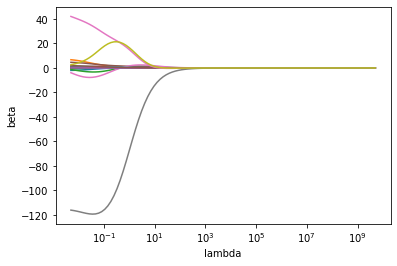

In [22]:
#Grafiquemos
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('beta')

#En esta gráfica vemos que entre más grande es lambda, más cercano a cero es beta

### $\lambda = 5$

In [23]:
## 5) CONSTRUIR UN MODELO
mod_ridge5 = Ridge(alpha = 5, normalize = True)
mod_ridge5.fit(X_train, Y_train)
print(pd.Series(mod_ridge5.coef_, index = X.columns)) # Valor de los coeficientes

AtBat           0.100548
Hits            0.424847
HmRun           1.405709
Runs            0.654171
RBI             0.707933
Walks           0.774173
Years           2.323034
CAtBat          0.007317
CHits           0.028747
CHmRun          0.242217
CRuns           0.057861
CRBI            0.062512
CWalks          0.057036
PutOuts         0.067121
Assists        -0.007762
Errors          0.199310
League_N        3.170722
Division_W    -24.628820
NewLeague_N     4.097406
dtype: float64


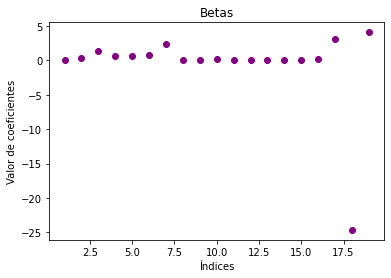

In [24]:
# Se grafican los valores de los coeficientes (betas).
eje_X = range(1,len(mod_ridge5.coef_)+1,1)
plt.scatter(eje_X, mod_ridge5.coef_, color = 'purple')
plt.title('Betas')
plt.xlabel('Índices')
plt.ylabel('Valor de coeficientes')
plt.show()

### Interpretación de los coeficientes

Con la gráfica anterior podemos ver que la mayoría de los coeficientes están cercanos a cero.

Esto nos indica que la mayoría de las variables no tienen una gran influencia en el modelo.

Las variables con $\beta_{i} > 1$ son:

|    Variable   | $\beta$ |
|:-----------:|:-------:|
|    HmRun    |  1.40  |
|    Years    |  2.32  |
|   League_N  |  3.17  |
| NewLeague_N |  4.09  |


Estas variables son las que más impactan en el sueldo del jugador.

El coeficiente de la variable _Division_W_ es $-24.628$. Esta variable impacta de manera negativa en el modelo.

Podemos concluir que jugar en la división del oeste implica tener un menor sueldo.


In [25]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = mod_ridge5.predict(X_test)
#print(X_test) #data frame
#print(Y_pred)

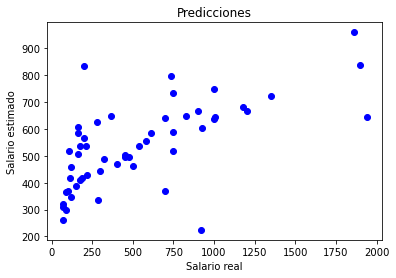

In [26]:
# Se grafican los resultados de la predicción.
plt.scatter(Y_test, Y_pred, color = 'blue')
plt.title('Predicciones')
plt.xlabel('Salario real')
plt.ylabel('Salario estimado')
plt.show()

# Nota: No estamos graficando contra ninguna variable explicativa.
#Los valores de las predicciones se graficaron contra el salario real.

In [27]:
## 7) EVALUACIÓN DEL MODELO CON lambda = 5
#Calculamos el error cuadrático medio: $\dfrac{\displaystyle \sum_{i = 1}^{n} (real_{i} − estimado_{i})^{2}}{n}$
ECM5 = round(mean_squared_error(Y_test, Y_pred),3) 
print(ECM5)

155941.988


### $\lambda = 0$

In [28]:
## 5) CONSTRUIR UN MODELO
mod_ridge0 = Ridge(alpha = 0, normalize = True)
mod_ridge0.fit(X_train, Y_train)
print(pd.Series(mod_ridge0.coef_, index = X.columns)) # Valor de los coeficientes

AtBat           -1.876566
Hits             6.589515
HmRun            0.254613
Runs            -0.445740
RBI              0.038896
Walks            4.562839
Years            6.146329
CAtBat          -0.356370
CHits            0.989676
CHmRun           1.590335
CRuns            0.765803
CRBI             0.267375
CWalks          -0.445449
PutOuts          0.287136
Assists          0.142581
Errors           1.654931
League_N        51.957325
Division_W    -116.575264
NewLeague_N     -3.259057
dtype: float64


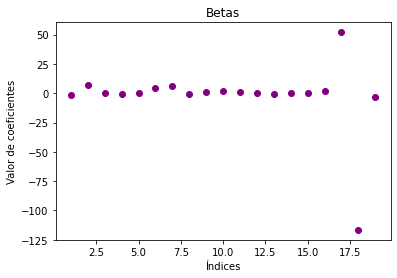

In [29]:
# Se grafican los valores de los coeficientes (betas).
eje_X = range(1,len(mod_ridge0.coef_)+1,1)
plt.scatter(eje_X, mod_ridge0.coef_, color = 'purple')
plt.title('Betas')
plt.xlabel('Índices')
plt.ylabel('Valor de coeficientes')
plt.show()

### Interpretación de los coeficientes

Con la gráfica anterior podemos ver que la mayoría de los coeficientes están cercanos a cero.

Esto nos indica que la mayoría de las variables no tienen una gran influencia en el modelo.

Las variables con $\beta_{i} \notin [-1,1]$ son:

|   Variable  | $\beta$ |
|:-----------:|:-------:|
|    AtBat    |  -1.87  |
|     Hits    |   6.58  |
|    Walks    |   4.56  |
|    Years    |   6.14  |
|    CHmRun   |   1.59  |
|    Errors   |   1.65  |
|   League_N  |  51.95  |
|  Division_W | -116.57 |
| NewLeague_N |  -3.25  |


En este caso $\lambda = 0$ por lo que no importa el valor de los coeficientes ya que al multiplicarse por $\lambda$ sus valores se anulan.

In [30]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = mod_ridge0.predict(X_test)

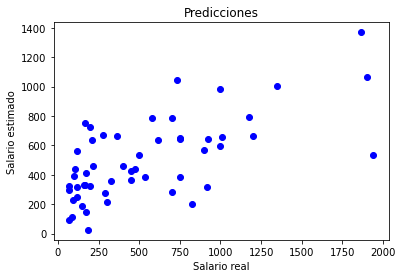

In [31]:
# Se grafican los resultados de la predicción.
plt.scatter(Y_test, Y_pred, color = 'blue')
plt.title('Predicciones')
plt.xlabel('Salario real')
plt.ylabel('Salario estimado')
plt.show()

# Nota: No estamos graficando contra ninguna variable explicativa.
#Los valores de las predicciones se graficaron contra el salario real.

In [32]:
## 7) EVALUACIÓN DEL MODELO CON lambda = 0
#Calculamos el error cuadrático medio: $\dfrac{\displaystyle \sum_{i = 1}^{n} (real_{i} − estimado_{i})^{2}}{n}$
ECM0 = round(mean_squared_error(Y_test, Y_pred),3) 
print(ECM0)

133595.033


### $\lambda$ definida con _cross validation_

In [33]:
## 5) CONSTRUIR UN MODELO
#Le pasamos como parámetro el vector con los diferentes valores de lambda para que
#se elija la mejor con "cross validation"
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train)
print('El valor de lambda encontrado con "cross validation" es: ',round(ridgecv.alpha_,3))

El valor de lambda encontrado con "cross validation" es:  0.012


In [34]:
#Verificamos que el valor encontrado está en el vector de lambdas
ridgecv.alpha_ in lambdas

True

In [35]:
#Se imprimen los valores de los coeficientes
mod_ridgeCV = Ridge(alpha = ridgecv.alpha_, normalize = True)
mod_ridgeCV.fit(X_train, Y_train)
print(pd.Series(mod_ridgeCV.coef_, index = X.columns)) # Valor de los coeficientes

AtBat           -1.694159
Hits             5.748560
HmRun           -2.405052
Runs             0.386345
RBI              0.921447
Walks            4.208601
Years           -6.624974
CAtBat          -0.073595
CHits            0.219630
CHmRun           1.195829
CRuns            0.540297
CRBI             0.300901
CWalks          -0.453995
PutOuts          0.298730
Assists          0.028026
Errors           1.708683
League_N        39.181406
Division_W    -117.511754
NewLeague_N      4.625766
dtype: float64


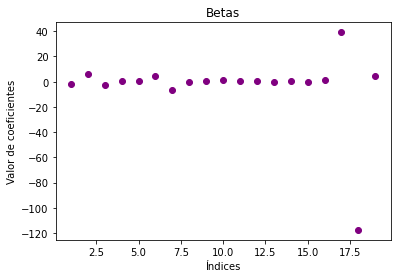

In [36]:
# Se grafican los valores de los coeficientes (betas).
eje_X = range(1,len(mod_ridgeCV.coef_)+1,1)
plt.scatter(eje_X, mod_ridgeCV.coef_, color = 'purple')
plt.title('Betas')
plt.xlabel('Índices')
plt.ylabel('Valor de coeficientes')
plt.show()

### Interpretación de los coeficientes

Con la gráfica anterior podemos ver que la mayoría de los coeficientes están cercanos a cero.

Esto nos indica que la mayoría de las variables no tienen una gran influencia en el modelo.

Las variables con $\beta_{i} \notin [-1,1]$ son:

|   Variable  | $\beta$ > 1 |  Variable  | $\beta$ < -1 |
|:-----------:|:-----------:|:----------:|:------------:|
|     Hits    |     5.74    |    AtBat   |     -1.69    |
|    Walks    |     4.20    |   CHmRun   |     -2.40    |
|    CHmRun   |     1.19    |    Years   |     -6.62    |
|    Errors   |     1.70    | Division_W |    -117.51   |
|   League_N  |    39.18    |      -     |       -      |
| NewLeague_N |     4.62    |      -     |       -      |



Las variables con $\beta > 1$ son las que más aportan en el sueldo del jugador.

El coeficiente de la variable _League_N_ es $39.18$. Podemos concluir que jugar en la liga nacional implica tener un mayor sueldo.

Las variables con $\beta < -1$ son las que impactan de manera negativa en el sueldo del jugador.

El coeficiente de la variable _Division_W_ es $-117.51$. Podemos concluir que jugar en la división del oeste implica tener un menor sueldo.

In [37]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = mod_ridgeCV.predict(X_test)

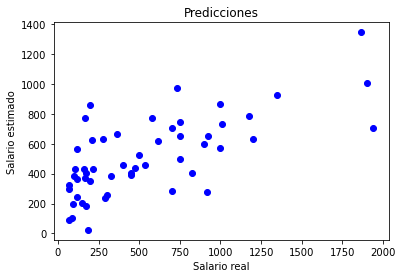

In [38]:
# Se grafican los resultados de la predicción.
plt.scatter(Y_test, Y_pred, color = 'blue')
plt.title('Predicciones')
plt.xlabel('Salario real')
plt.ylabel('Salario estimado')
plt.show()

# Nota: No estamos graficando contra ninguna variable explicativa.
#Los valores de las predicciones se graficaron contra el salario real.

In [39]:
## 7) EVALUACIÓN DEL MODELO CON lambda ELEGIDA CON "cross validation"
#Calculamos el error cuadrático medio: $\dfrac{\displaystyle \sum_{i = 1}^{n} (real_{i} − estimado_{i})^{2}}{n}$
ECMcv = round(mean_squared_error(Y_test, Y_pred),3) 
print(ECMcv)

126184.291


In [40]:
# Comparamos el error cuadrático medio (ECM) de cada modelo:
print("ECM con lambda = 5 es: ",ECM5)
print("ECM con lambda = 0 es: ",ECM0)
print("ECM con lambda elegida es: ",ECMcv)

ECM con lambda = 5 es:  155941.988
ECM con lambda = 0 es:  133595.033
ECM con lambda elegida es:  126184.291


Notamos que el error cuadrático medio menor es el del modelo en el que se elige $\lambda$ con _cross validation_.

Elegimos ese modelo para seguir la evaluación.

#### 7) EVALUACIÓN DEL MODELO ELEGIDO
Veamos cómo se comporta el modelo:

7.1 Calcular $R^{2}$ ajustada $ = 1 - \dfrac{(1 - R^{2}) (n-1)}{n - p - 1}$, donde

$R^{2}:$ R cuadrada de los datos

$n:$ Número de datos para entrenar al modelo

$p:$ Número de variables independientes

7.2 Calcular los errores absolutos $(real - estimado)$ y graficarlos

7.3 Calcular los errores relativos $\left( \dfrac{\text{real - estimado}}{\text{real}} \right)$ y graficarlos

7.4 Graficar valores estimados vs valores reales

7.5 Calcular el error cuadrático: $(real − estimado)^{2}$


In [41]:
#7.1 Calcular R^2 ajustada
r_cuadrada = r2_score(Y_test,Y_pred)
print('R^2 = ',round(r_cuadrada,3)) #Porcentaje de los datos explicados por el modelo

#R^2 ajustada
n = len(Y_train)
p = X_train.shape[1]
r_cuad_aj = 1 - (((1-r_cuadrada)*(n-1))/(n-p-1))

print('n = ',n)
print('p = ',p)
print('R^2_aj = ',round(r_cuad_aj,3))

R^2 =  0.449
n =  210
p =  19
R^2_aj =  0.394


### Interpretación de $R^{2}$ y $R_{aj}^{2}$

Con $R^{2} =  0.44$ y $R_{aj}^{2} =  0.39$ vemos que el porcentaje de los datos explicados por el modelo es menor al $50\%$.

Recordemos que en el análisis de los valores de los coeficientes vimos que la mayoría de las variables no eran significativas para el modelo.

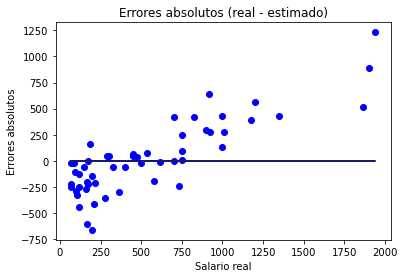

In [42]:
#7.2 Calcular los errores absolutos (real - estimado) y graficarlos
err_abs = Y_test-Y_pred

plt.scatter(Y_test, err_abs, color = 'blue')
plt.plot(Y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('Salario real')
plt.ylabel('Errores absolutos')
plt.show()

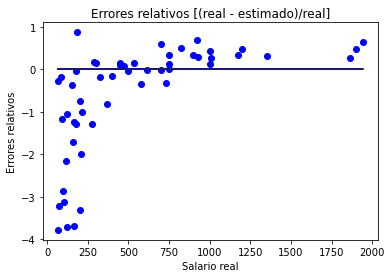

In [43]:
#7.3 Calcular los errores relativos [(real - estimado)/real] y graficarlos
err_rel = err_abs/Y_test

plt.scatter(Y_test, err_rel, color = 'blue')
plt.plot(Y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Salario real')
plt.ylabel('Errores relativos')
plt.show()

#Se tiene un mayor error en salarios bajos

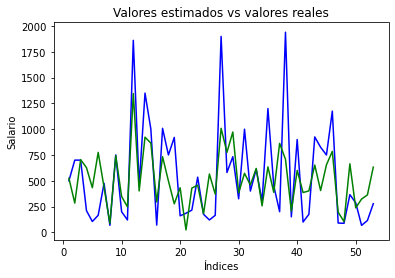

In [44]:
#7.4 Graficar valores estimados vs valores reales
eje_X = range(1,len(Y_test)+1)
plt.plot(eje_X, Y_test, color = 'blue') #Recta de valores reales
plt.plot(eje_X, Y_pred, color = 'green') #Recta de valores estimados
plt.title('Valores estimados vs valores reales')
plt.xlabel('Índices')
plt.ylabel('Salario')
plt.show()

ECM con lambda =  0.012  es:  126184.291


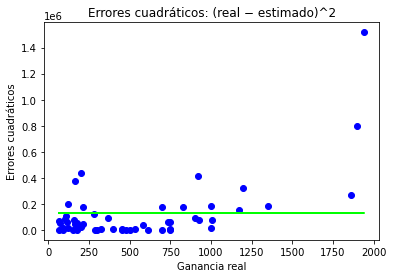

In [45]:
#7.5 Calcular el error cuadrático = (real − estimado)^2
#print(np.around(err_abs,2))
err_cuad = pow(err_abs,2)#Vector

print("ECM con lambda = ",round(ridgecv.alpha_,3)," es: ",ECMcv)

#Graficamos los errores cuadráticos
Y= np.repeat(ECMcv, len(err_cuad))
plt.scatter(Y_test, err_cuad, color = 'blue')
plt.plot(Y_test,Y , color = 'lime') #Recta en Y = error cuadrático medio
plt.title('Errores cuadráticos: (real − estimado)^2')
plt.xlabel('Ganancia real')
plt.ylabel('Errores cuadráticos')
plt.show()